In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ka_rice_df = pd.read_csv('../data/karnataka_rice_2000_2017.csv')

ka_rice_df.head()


,Dist Code,Year,State Code,State Name,Dist Name,Crop,Area_ha,Yield_kg_per_ha,N_req_kg_per_ha,P_req_kg_per_ha,K_req_kg_per_ha,Total_N_kg,Total_P_kg,Total_K_kg,Temperature_C,Humidity_%,pH,Rainfall_mm,Wind_Speed_m_s,Solar_Radiation_MJ_m2_day
0,64,2000,5,Karnataka,Bangalore,rice,29400.0,2585.03,64.62575,31.02036,56.87066,1899997.050,911998.5840,1.671997e+06,25,80,6.5,1200,2.0,18
1,64,2001,5,Karnataka,Bangalore,rice,19660.0,2396.74,59.91850,28.76088,52.72828,1177997.710,565438.9008,1.036638e+06,25,80,6.5,1200,2.0,18
2,64,2002,5,Karnataka,Bangalore,rice,9050.0,2245.30,56.13250,26.94360,49.39660,507999.125,243839.5800,4.470392e+05,25,80,6.5,1200,2.0,18
3,64,2003,5,Karnataka,Bangalore,rice,9220.0,2529.28,63.23200,30.35136,55.64416,582999.040,279839.5392,5.130392e+05,25,80,6.5,1200,2.0,18
4,64,2004,5,Karnataka,Bangalore,rice,12870.0,3042.74,76.06850,36.51288,66.94028,979001.595,469920.7656,8.615214e+05,25,80,6.5,1200,2.0,18


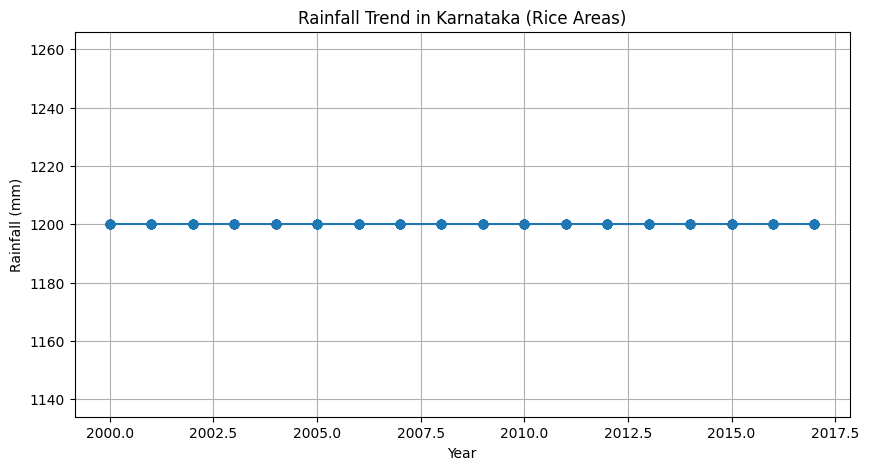

In [2]:
plt.figure(figsize=(10,5))
plt.plot(ka_rice_df['Year'], ka_rice_df['Rainfall_mm'], marker='o')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Trend in Karnataka (Rice Areas)')
plt.grid(True)
plt.show()


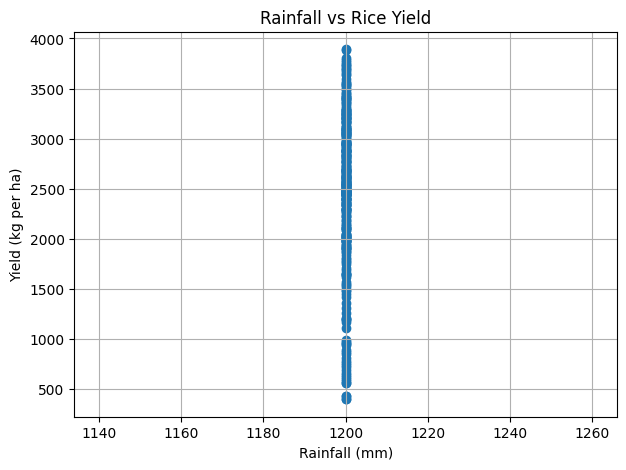

In [3]:
plt.figure(figsize=(7,5))
plt.scatter(ka_rice_df['Rainfall_mm'], ka_rice_df['Yield_kg_per_ha'])
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield (kg per ha)')
plt.title('Rainfall vs Rice Yield')
plt.grid(True)
plt.show()


In [5]:
# Remove rows where Rainfall or Yield is missing
clean_water_df = ka_rice_df[['Rainfall_mm', 'Yield_kg_per_ha']].dropna()

clean_water_df.head()


,Rainfall_mm,Yield_kg_per_ha
0,1200,2585.03
1,1200,2396.74
2,1200,2245.30
3,1200,2529.28
4,1200,3042.74


In [6]:
correlation = clean_water_df['Rainfall_mm'].corr(clean_water_df['Yield_kg_per_ha'])
print("Correlation between Rainfall and Yield:", correlation)


Correlation between Rainfall and Yield: nan


c:\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [7]:
print("Rainfall unique values:", clean_water_df['Rainfall_mm'].nunique())
print("Yield unique values:", clean_water_df['Yield_kg_per_ha'].nunique())


Rainfall unique values: 1
Yield unique values: 339


In [8]:
print("Rainfall std:", clean_water_df['Rainfall_mm'].std())
print("Yield std:", clean_water_df['Yield_kg_per_ha'].std())


Rainfall std: 0.0
Yield std: 758.4333650761055


In [9]:
yearly_df = ka_rice_df.groupby('Year').agg({
    'Rainfall_mm': 'mean',
    'Yield_kg_per_ha': 'mean'
}).reset_index()

yearly_df.head()


,Year,Rainfall_mm,Yield_kg_per_ha
0,2000,1200.0,2413.358421
1,2001,1200.0,2154.023158
2,2002,1200.0,1994.035789
3,2003,1200.0,2233.825789
4,2004,1200.0,2622.312105


In [10]:
correlation = yearly_df['Rainfall_mm'].corr(yearly_df['Yield_kg_per_ha'])
print("Correlation between Rainfall and Yield:", correlation)


Correlation between Rainfall and Yield: nan


c:\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [11]:
yearly_df = ka_rice_df.groupby('Year').agg({
    'Rainfall_mm': 'mean',
    'Yield_kg_per_ha': 'mean'
}).reset_index()

print(yearly_df.head())
print("\nCheck for NaNs:")
print(yearly_df.isna().sum())

print("\nStandard Deviation:")
print("Rainfall std:", yearly_df['Rainfall_mm'].std())
print("Yield std:", yearly_df['Yield_kg_per_ha'].std())

print("\nUnique values:")
print("Rainfall unique:", yearly_df['Rainfall_mm'].nunique())
print("Yield unique:", yearly_df['Yield_kg_per_ha'].nunique())


   Year  Rainfall_mm  Yield_kg_per_ha
0  2000       1200.0      2413.358421
1  2001       1200.0      2154.023158
2  2002       1200.0      1994.035789
3  2003       1200.0      2233.825789
4  2004       1200.0      2622.312105

Check for NaNs:
Year               0
Rainfall_mm        0
Yield_kg_per_ha    0
dtype: int64

Standard Deviation:
Rainfall std: 0.0
Yield std: 213.24494493975195

Unique values:
Rainfall unique: 1
Yield unique: 18


In [12]:
print(yearly_df.dtypes)


Year                 int64
Rainfall_mm        float64
Yield_kg_per_ha    float64
dtype: object


In [13]:
yearly_df['Rainfall_mm'] = pd.to_numeric(yearly_df['Rainfall_mm'], errors='coerce')


In [14]:
rainfall_df = pd.read_excel('../data/NDTV/climate_data/chirps_rainfall_timeseries.xlsx')

rainfall_df.head()


,system:index,date,precipitation,region,system:band_names,system:bands,.geo
0,1_1_20200101,2020-01-01,0.019835,Marathwada,NaN,NaN,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,1_1_20200102,2020-01-02,0.191575,Marathwada,NaN,NaN,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,1_1_20200103,2020-01-03,0.000000,Marathwada,NaN,NaN,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,1_1_20200104,2020-01-04,0.000000,Marathwada,NaN,NaN,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,1_1_20200105,2020-01-05,0.000000,Marathwada,NaN,NaN,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [15]:
rainfall_df['region'].unique()


array(['Marathwada', 'Bundelkhand', 'Eastern_Tamil_Nadu'], dtype=object)

In [16]:
rainfall_df['region'].unique()


array(['Marathwada', 'Bundelkhand', 'Eastern_Tamil_Nadu'], dtype=object)

In [18]:
import os
print(os.listdir('../data'))


['.gitkeep', 'archive', 'karnataka_rice_2000_2017.csv', 'NDTV']


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

tn_rice_df = pd.read_csv('../data/tamilnadu_rice_2000_2017.csv')

tn_rice_df.head()


,Dist Code,Year,State Code,State Name,Dist Name,Crop,Area_ha,Yield_kg_per_ha,N_req_kg_per_ha,P_req_kg_per_ha,K_req_kg_per_ha,Total_N_kg,Total_P_kg,Total_K_kg,Temperature_C,Humidity_%,pH,Rainfall_mm,Wind_Speed_m_s,Solar_Radiation_MJ_m2_day
0,83,2000,11,Tamil Nadu,Chengalpattu MGR / Kanchipuram,rice,225920.0,3385.27,84.63175,40.62324,74.47594,19120004.96,9.177602e+06,1.682560e+07,25,80,6.5,1200,2.0,18
1,83,2001,11,Tamil Nadu,Chengalpattu MGR / Kanchipuram,rice,229580.0,3487.02,87.17550,41.84424,76.71444,20013751.29,9.606601e+06,1.761210e+07,25,80,6.5,1200,2.0,18
2,83,2002,11,Tamil Nadu,Chengalpattu MGR / Kanchipuram,rice,185180.0,3011.18,75.27950,36.13416,66.24596,13940257.81,6.691324e+06,1.226743e+07,25,80,6.5,1200,2.0,18
3,83,2003,11,Tamil Nadu,Chengalpattu MGR / Kanchipuram,rice,172060.0,2854.70,71.36750,34.25640,62.80340,12279492.05,5.894156e+06,1.080595e+07,25,80,6.5,1200,2.0,18
4,83,2004,11,Tamil Nadu,Chengalpattu MGR / Kanchipuram,rice,168400.0,3010.69,75.26725,36.12828,66.23518,12675004.90,6.084002e+06,1.115400e+07,25,80,6.5,1200,2.0,18


In [20]:
rainfall_df = pd.read_excel('../data/NDTV/climate_data/chirps_rainfall_timeseries.xlsx')

rainfall_df.head()


,system:index,date,precipitation,region,system:band_names,system:bands,.geo
0,1_1_20200101,2020-01-01,0.019835,Marathwada,NaN,NaN,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,1_1_20200102,2020-01-02,0.191575,Marathwada,NaN,NaN,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,1_1_20200103,2020-01-03,0.000000,Marathwada,NaN,NaN,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,1_1_20200104,2020-01-04,0.000000,Marathwada,NaN,NaN,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,1_1_20200105,2020-01-05,0.000000,Marathwada,NaN,NaN,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [21]:
rainfall_df['date'] = pd.to_datetime(rainfall_df['date'])

rainfall_df['Year'] = rainfall_df['date'].dt.year

rainfall_tn = rainfall_df[rainfall_df['region'] == 'Eastern_Tamil_Nadu']

rainfall_tn.head()


,system:index,date,precipitation,region,system:band_names,system:bands,.geo,Year
2920,2_20200101,2020-01-01,2.543410,Eastern_Tamil_Nadu,NaN,NaN,"{""type"":""MultiPoint"",""coordinates"":[]}",2020
2921,2_20200102,2020-01-02,0.325492,Eastern_Tamil_Nadu,NaN,NaN,"{""type"":""MultiPoint"",""coordinates"":[]}",2020
2922,2_20200103,2020-01-03,0.000000,Eastern_Tamil_Nadu,NaN,NaN,"{""type"":""MultiPoint"",""coordinates"":[]}",2020
2923,2_20200104,2020-01-04,0.050932,Eastern_Tamil_Nadu,NaN,NaN,"{""type"":""MultiPoint"",""coordinates"":[]}",2020
2924,2_20200105,2020-01-05,0.098658,Eastern_Tamil_Nadu,NaN,NaN,"{""type"":""MultiPoint"",""coordinates"":[]}",2020


In [22]:
yearly_rainfall = rainfall_tn.groupby('Year')['precipitation'].sum().reset_index()

yearly_rainfall.head()


,Year,precipitation
0,2020,1243.302363
1,2021,1597.774143
2,2022,1265.086459
3,2023,1285.330520


In [23]:
merged_df = pd.merge(tn_rice_df, yearly_rainfall, on='Year')

merged_df.head()


,Dist Code,Year,State Code,State Name,Dist Name,Crop,Area_ha,Yield_kg_per_ha,N_req_kg_per_ha,P_req_kg_per_ha,...,Total_N_kg,Total_P_kg,Total_K_kg,Temperature_C,Humidity_%,pH,Rainfall_mm,Wind_Speed_m_s,Solar_Radiation_MJ_m2_day,precipitation


In [24]:
correlation = merged_df['precipitation'].corr(merged_df['Yield_kg_per_ha'])

print("Correlation between Rainfall and Yield:", correlation)


Correlation between Rainfall and Yield: nan


In [25]:
print("Rice years:")
print(tn_rice_df['Year'].min(), tn_rice_df['Year'].max())

print("\nRainfall years:")
print(yearly_rainfall['Year'].min(), yearly_rainfall['Year'].max())


Rice years:
2000 2017

Rainfall years:
2020 2023


In [26]:
tn_rice_df = tn_rice_df[tn_rice_df['Year'] >= 2020]
